In [1]:
'''Assignment 10.1

In this assignment students need to predict whether a person makes over 50K per year
or not from classic adult dataset using XGBoost. The description of the dataset is as
follows:

Data Set Information:
Extraction was done by Barry Becker from the 1994 Census database. A set of
reasonably clean records was extracted using the following conditions: ((AAGE>16) &&
(AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Attribute Information:
Listing of attributes:
>50K, <=50K.
age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov,
Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc,
9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed,
Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial,
Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing,
Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany,
Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras,
Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala,
Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong,
Holand-Netherlands.
Following is the code to load required libraries and data:
import numpy as np
import pandas as pd
train_set =
pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

test_set =
pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'
, skiprows = 1, header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels'''

import numpy as np
import pandas as pd
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [2]:
#Let’s check our train and test sets for any possible issues.
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [4]:
#Next, let’s check to see if pandas has identified any of these missing values
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education_num     16281 non-null int64
marital_status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16281 non-null object
wage_class        16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [6]:
#It seems none of the columns have missing values
train_set.shape

(32561, 15)

In [7]:
test_set.shape

(16281, 15)

In [8]:
#It seems there are ? in train and test data. drop such rows and check no of rows again
train_set.replace(' ?', np.nan).dropna().shape 

(30162, 15)

In [9]:
test_set.replace(' ?', np.nan).dropna().shape 

(15060, 15)

In [10]:
#These must be our missing rows since the numbers add up now if we drop them. Let’s apply this change to our test and training sets
train_nomissing = train_set.replace(' ?', np.nan).dropna()
test_nomissing = test_set.replace(' ?', np.nan).dropna()

In [11]:
'''Now that we have taken care of the missing value problem, 
we still have an issue with the target income thresholds being encoded slightly differently in test vs. train. 
We need these to match up appropriately, so we are going to need to fix either the test or training set to make them match up. 
Let’s replace all of the ‘<=50K.’ with ‘<=50K’ and the same for ‘>50K.’ with ‘>50K’, so essentially, 
we are just dropping the periods. This is also encoded with a space so include this in the string. 
We can use the replace method from pandas to fix this.'''
test_nomissing['wage_class'] = test_nomissing.wage_class.replace({' <=50K.': ' <=50K', ' >50K.':' >50K'})

In [12]:
#Checking the unique values from each set, we can see if they now match
test_nomissing.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

In [13]:
train_nomissing.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

In [14]:
#Now these look the same. There is one thing we need to do, 
#however, before applying XGBoost. We need to make sure everything encoded as a string is turned into a variable
#Our next step is to use ordinal encoding for the features with a string category since XGBoost
#(like all of the other machine learning algorithms in Python) requires every feature vector to include only digits
combined_set = pd.concat([train_nomissing, test_nomissing], axis = 0) # Stacks them vertically

In [15]:
combined_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 16280
Data columns (total 15 columns):
age               45222 non-null int64
workclass         45222 non-null object
fnlwgt            45222 non-null int64
education         45222 non-null object
education_num     45222 non-null int64
marital_status    45222 non-null object
occupation        45222 non-null object
relationship      45222 non-null object
race              45222 non-null object
sex               45222 non-null object
capital_gain      45222 non-null int64
capital_loss      45222 non-null int64
hours_per_week    45222 non-null int64
native_country    45222 non-null object
wage_class        45222 non-null object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [16]:
'''We can see they are now combined. Next, if the feature is not already numerical, we need to encode it as one. 
We can use pandas Categorical codes for this task. To make things more simple, I will use a loop to apply this on every feature 
that isn’t an integer.'''
for feature in combined_set.columns: # Loop through all columns in the dataframe
    if combined_set[feature].dtype == 'object': # Only apply for columns with categorical strings
        combined_set[feature] = pd.Categorical(combined_set[feature]).codes # Replace strings with an integer

In [17]:
combined_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 16280
Data columns (total 15 columns):
age               45222 non-null int64
workclass         45222 non-null int8
fnlwgt            45222 non-null int64
education         45222 non-null int8
education_num     45222 non-null int64
marital_status    45222 non-null int8
occupation        45222 non-null int8
relationship      45222 non-null int8
race              45222 non-null int8
sex               45222 non-null int8
capital_gain      45222 non-null int64
capital_loss      45222 non-null int64
hours_per_week    45222 non-null int64
native_country    45222 non-null int8
wage_class        45222 non-null int8
dtypes: int64(6), int8(9)
memory usage: 2.8 MB


In [18]:
'''Now that we have all of our features encoded, we need to split these back into their original train/test sizes. 
Since they haven’t been shuffled we just need to retrieve the same indices as before.'''
final_train = combined_set[:train_nomissing.shape[0]] # Up to the last initial training set row
final_test = combined_set[train_nomissing.shape[0]:] # Past the last initial training set row

In [19]:
#Now finally we can apply XGBoost.
#We still have our target value inside our train and test frames that needs to be separated from the feature vectors 
#we will be feeding into XGBoost. Let’s get those now
y_train = final_train.pop('wage_class')
y_test = final_test.pop('wage_class')

In [20]:
#Now import the libraries we will need to do grid search for XGBoost. Fortunately for those of us used to sklearn’s API, 
#XGBoost is compatible with this, so we can still utilize the traditional GridSearch with XGBoost.
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [21]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 
# Optimize for accuracy since that is the metric used in the Adult Data Set notation

In [22]:
#Now let’s run our grid search with 5-fold cross-validation and see which parameters perform the best
optimized_GBM.fit(final_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [23]:
#Let’s check our grid scores.
optimized_GBM.grid_scores_

[mean: 0.86685, std: 0.00239, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.86659, std: 0.00371, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.86725, std: 0.00317, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: 0.86178, std: 0.00317, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: 0.85953, std: 0.00251, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: 0.86158, std: 0.00239, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.85611, std: 0.00330, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: 0.85525, std: 0.00323, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.85714, std: 0.00320, params: {'max_depth': 7, 'min_child_weight': 5}]

In [24]:
'''We can see that the first hyperparameter combination performed best and we already beat our target of 85.95% accuracy in our
cross-validation! 
Let’s try optimizing some other hyperparameters now to see if we can beat a mean of 86.78% accuracy. 
This time, we will play around with subsampling along with lowering the learning rate to see if that helps.'''
cv_params = {'learning_rate': [0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
ind_params = {'n_estimators': 1000, 'seed':0, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth': 3, 'min_child_weight': 1}


optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1)
optimized_GBM.fit(final_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.01], 'subsample': [0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [25]:
#Again, check the grid scores
optimized_GBM.grid_scores_

[mean: 0.86622, std: 0.00271, params: {'learning_rate': 0.1, 'subsample': 0.7},
 mean: 0.86685, std: 0.00239, params: {'learning_rate': 0.1, 'subsample': 0.8},
 mean: 0.86771, std: 0.00349, params: {'learning_rate': 0.1, 'subsample': 0.9},
 mean: 0.85999, std: 0.00307, params: {'learning_rate': 0.01, 'subsample': 0.7},
 mean: 0.86032, std: 0.00272, params: {'learning_rate': 0.01, 'subsample': 0.8},
 mean: 0.86002, std: 0.00282, params: {'learning_rate': 0.01, 'subsample': 0.9}]

In [26]:
#No, it doesn’t look like we can improve on this. However, we may be able to optimize a little further by utilizing XGBoost’s 
#built-in cv which allows early stopping to prevent overfitting
'''Based on the CV testing performed earlier, we want to utilize the following parameters:

Learning_rate (eta) = 0.1
Subsample, colsample_bytree = 0.8
Max_depth = 3
Min_child_weight = 1
There are a few other parameters we could tune in theory to squeeze out further performance, but this is a good enough starting point.

To increase the performance of XGBoost’s speed through many iterations of the training set, and since we are using only XGBoost’s API and not sklearn’s anymore, we can create a DMatrix. This sorts the data initially to optimize for XGBoost when it builds trees, making the algorithm more efficient. This is especially helpful when you have a very large number of training examples. To create a DMatrix:'''
xgdmat = xgb.DMatrix(final_train, y_train) # Create our DMatrix to make XGBoost more efficient

In [28]:
#Now let’s specify our parameters (with slightly different syntax in some places for the XGBoost native API) and set our 
#stopping criteria. For now, let’s be aggressive with the stopping and say we don’t want the accuracy to improve for at least 100 new trees.
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1} 
# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 5,
                metrics = ['error'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100) # Look for early stopping that minimizes error

In [29]:
#We can look at our CV results to see how accurate we were with these settings. The output is automatically saved into a pandas dataframe for us.
cv_xgb.tail(5)

,test-error-mean,test-error-std,train-error-mean,train-error-std
458,0.129898,0.005536,0.116521,0.000994
459,0.129965,0.005315,0.116446,0.000983
460,0.129832,0.005425,0.116455,0.000975
461,0.129500,0.005550,0.116338,0.000941
462,0.129434,0.005663,0.116338,0.000875


In [30]:
'''Our CV test error at this number of iterations is 12.897%, or 87.103% accuracy.

Now that we have our best settings, let’s create this as an XGBoost object model that we can reference later.'''
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 432)

In [31]:
'''Notice that it trains very quickly. With our XG model object, we can then plot our feature importances using a built-in method.
This is similar to the feature importances found in sklearn'''
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)

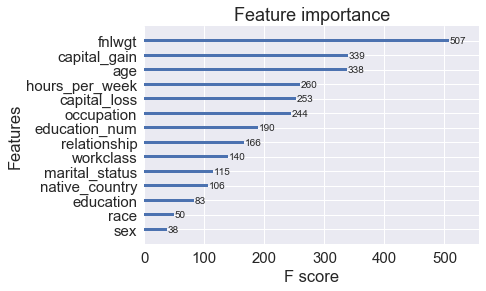

In [32]:
xgb.plot_importance(final_gb)

In [33]:
'''This will tell us which features were most important in the series of trees. The ‘fnlwgt’ feature seems to have the most 
importance. Filing capital gains was also important, which makes sense given that only those with greater incomes have the 
ability to invest. Race and sex were not as important. This may be because we are just predicting a specific threshold 
(below/above 50000 a year) instead of a precise income.

If the built-in feature importance method isn’t what you wanted, you can make your own chart of feature importances using the
get_fscore method:'''
importances = final_gb.get_fscore()
importances

{'age': 338,
 'capital_gain': 339,
 'capital_loss': 253,
 'education': 83,
 'education_num': 190,
 'fnlwgt': 507,
 'hours_per_week': 260,
 'marital_status': 115,
 'native_country': 106,
 'occupation': 244,
 'race': 50,
 'relationship': 166,
 'sex': 38,
 'workclass': 140}

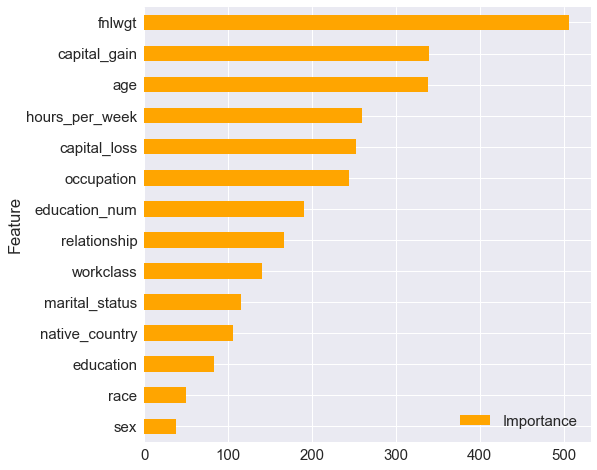

In [34]:
#Given this dictionary, we can now make a plot of it ourselves.
importance_frame = pd.DataFrame({'Importance': list(importances.values()), 'Feature': list(importances.keys())})
importance_frame.sort_values(by = 'Importance', inplace = True)
importance_frame.plot(kind = 'barh', x = 'Feature', figsize = (8,8), color = 'orange')

In [35]:
'''Now that we have an understanding of the feature importances, we can at least figure out better what is driving the splits 
most for the trees and where we may be able to make some improvements in feature engineering if possible. You can try playing 
around with the hyperparameters yourself or engineer some new features to see if you can beat the current benchmarks.'''
'''Analyzing Performance on Test Data
The model has now been tuned using cross-validation grid search through the sklearn API and early stopping through the built-in 
XGBoost API. Now, we can see how it finally performs on the test set. Does it match our CV performance? First, create another 
DMatrix (this time for the test data).'''

testdmat = xgb.DMatrix(final_test)

In [36]:
#Now let’s use sklearn’s accuracy metric to see how well we did on the test set.
from sklearn.metrics import accuracy_score
y_pred = final_gb.predict(testdmat) # Predict using our testdmat
y_pred

array([0.00303194, 0.2071426 , 0.3024281 , ..., 0.8288712 , 0.16432679,
       0.7885478 ], dtype=float32)

In [37]:
'''You can see that the predict function for XGBoost outputs probabilities by default and not actual class labels. To calculate accuracy we need to convert these to a 0/1 label. We will set 0.5 probability as our threshold.'''
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
y_pred

array([0., 0., 0., ..., 1., 0., 1.], dtype=float32)

In [38]:
#Now we can calculate our accuracy.
accuracy_score(y_pred, y_test), 1-accuracy_score(y_pred, y_test)

(0.8686586985391767, 0.13134130146082335)

In [ ]:
#Our final accuracy is 86.86%, or a 13.13% error rate. We beat our goal by a whole percentage point!